# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime as dt

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key + "&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response= requests.get(city_url).json()
        city_weather = response["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | castillos
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | west island
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | bilibino
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | gorno-altaysk
Processing Record 13 of Set 1 | frantiskovy lazne
Processing Record 14 of Set 1 | port mathurin
Processing Record 15 of Set 1 | olonkinbyen
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | salem
Processing Record 18 of Set 1 | barcelos
Processing Record 19 of Set 1 | bredasdorp
Processing Record 20 of Set 1 | bela
Processing Record 21 of Set 1 | hermanus
Processing Record 22 of Set 1 | isla

Processing Record 40 of Set 4 | peruibe
Processing Record 41 of Set 4 | klyuchi
Processing Record 42 of Set 4 | port blair
Processing Record 43 of Set 4 | villa juarez
Processing Record 44 of Set 4 | nar'yan-mar
Processing Record 45 of Set 4 | les avirons
Processing Record 46 of Set 4 | ugoofaaru
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | aasiaat
Processing Record 49 of Set 4 | sechura
Processing Record 0 of Set 5 | sitka
Processing Record 1 of Set 5 | namdrik
Processing Record 2 of Set 5 | dalnegorsk
Processing Record 3 of Set 5 | bontang
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | sisimiut
Processing Record 6 of Set 5 | yuzhno-kurilsk
Processing Record 7 of Set 5 | wegorzewo
Processing Record 8 of Set 5 | remire-montjoly
Processing Record 9 of Set 5 | gornopravdinsk
Processing Record 10 of Set 5 | gamay
Processing Record 11 of Set 5 | tadine
Processing Record 12 of Set 5 | ust-nera
Processing Record 13 of Set 5 |

Processing Record 34 of Set 8 | suklayin
Processing Record 35 of Set 8 | acajutla
Processing Record 36 of Set 8 | fort wellington
Processing Record 37 of Set 8 | santiago de cao
Processing Record 38 of Set 8 | pahrump
Processing Record 39 of Set 8 | cabedelo
Processing Record 40 of Set 8 | kovdor
Processing Record 41 of Set 8 | marsh harbour
Processing Record 42 of Set 8 | hluti
Processing Record 43 of Set 8 | candelaria
Processing Record 44 of Set 8 | mahanoro
Processing Record 45 of Set 8 | borba
Processing Record 46 of Set 8 | lompoc
Processing Record 47 of Set 8 | lefka
Processing Record 48 of Set 8 | greenville
Processing Record 49 of Set 8 | pedra branca
Processing Record 0 of Set 9 | paripiranga
Processing Record 1 of Set 9 | manaure
Processing Record 2 of Set 9 | kyelang
Processing Record 3 of Set 9 | tidjikja
Processing Record 4 of Set 9 | lebu
Processing Record 5 of Set 9 | kerikeri
Processing Record 6 of Set 9 | wewak
Processing Record 7 of Set 9 | khouribga
Processing Recor

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,castillos,-34.1667,-53.8333,13.14,93,5,3.11,UY,1684281045
1,port-aux-francais,-49.3500,70.2167,7.88,94,100,15.88,TF,1684281014
2,punta arenas,-53.1500,-70.9167,5.06,81,0,4.63,CL,1684280757
3,west island,-12.1568,96.8225,26.99,74,40,4.12,CC,1684281007
4,bethel,41.3712,-73.4140,23.93,36,0,2.06,US,1684281035


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castillos,-34.1667,-53.8333,13.14,93,5,3.11,UY,1684281045
1,port-aux-francais,-49.3500,70.2167,7.88,94,100,15.88,TF,1684281014
2,punta arenas,-53.1500,-70.9167,5.06,81,0,4.63,CL,1684280757
3,west island,-12.1568,96.8225,26.99,74,40,4.12,CC,1684281007
4,bethel,41.3712,-73.4140,23.93,36,0,2.06,US,1684281035


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

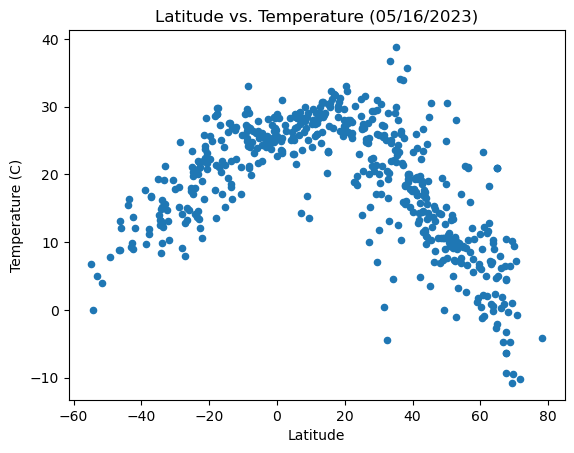

In [11]:
# Build scatter plot for latitude vs. temperature
date = round(city_data_df["Date"].median())
formated_date = dt.fromtimestamp(date).date().strftime("%m/%d/%Y")

# Incorporate the other graph properties
city_data_df.plot("Lat",
                  "Max Temp",
                  kind="scatter",
                  xlabel="Latitude",
                  ylabel="Temperature (C)",
                  title=f"Latitude vs. Temperature ({formated_date})")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

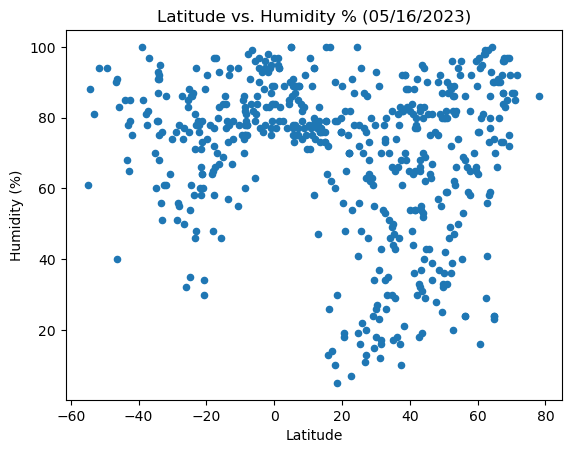

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot("Lat",
                  "Humidity",
                  kind="scatter",
                  xlabel="Latitude",
                  ylabel="Humidity (%)",
                  title=f"Latitude vs. Humidity % ({formated_date})")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

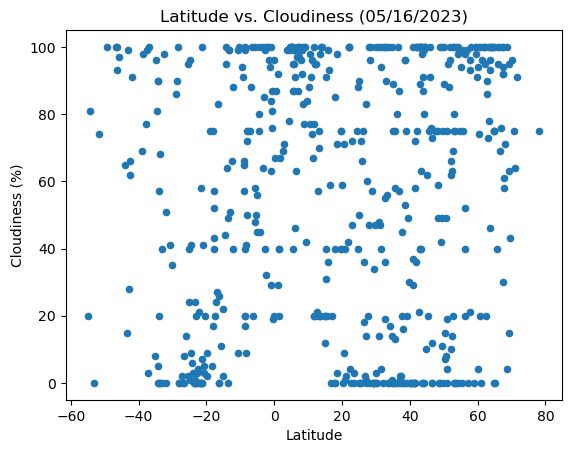

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot("Lat",
                  "Cloudiness",
                  kind="scatter",
                  xlabel="Latitude",
                  ylabel="Cloudiness (%)",
                  title=f"Latitude vs. Cloudiness ({formated_date})")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

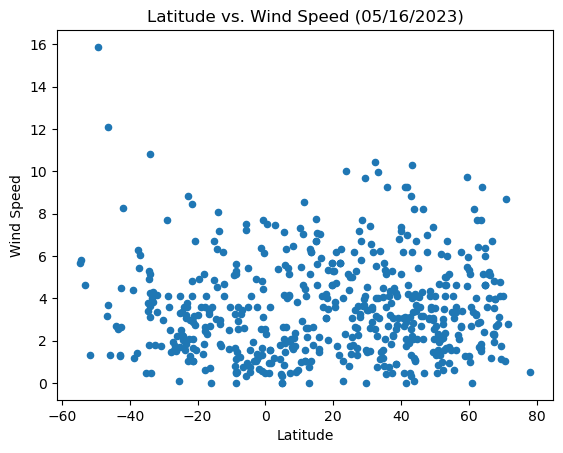

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot("Lat",
                  "Wind Speed",
                  kind="scatter",
                  xlabel="Latitude",
                  ylabel="Wind Speed",
                  title=f"Latitude vs. Wind Speed ({formated_date})")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def reg_plot(x,y,xlabel,ylabel,title,annotate,size):
    #get regression line information
    (slope, intercept, rvalue, pvalue, stderr)= linregress(x, y)
    regress_values = x * slope + intercept
    
    #develop regression line
    line_and_r = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + "\n" + "\n"\
                    + "r = " + str(round(rvalue,8))
    
    
    # Plot the linear model on top of scatter plot 
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_and_r,annotate,fontsize=size,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
north_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bethel,41.3712,-73.4140,23.93,36,0,2.06,US,1684281035
5,ribeira grande,38.5167,-28.7000,19.32,92,96,0.89,PT,1684281026
6,bilibino,68.0546,166.4372,-0.38,83,71,2.67,RU,1684280955
8,tiksi,71.6872,128.8694,-10.15,92,91,2.77,RU,1684281030
9,college,64.8569,-147.8028,20.97,23,75,4.63,US,1684281049


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
south_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,castillos,-34.1667,-53.8333,13.14,93,5,3.11,UY,1684281045
1,port-aux-francais,-49.3500,70.2167,7.88,94,100,15.88,TF,1684281014
2,punta arenas,-53.1500,-70.9167,5.06,81,0,4.63,CL,1684280757
3,west island,-12.1568,96.8225,26.99,74,40,4.12,CC,1684281007
7,edinburgh of the seven seas,-37.0676,-12.3116,16.86,97,100,6.03,SH,1684281004


###  Temperature vs. Latitude Linear Regression Plot

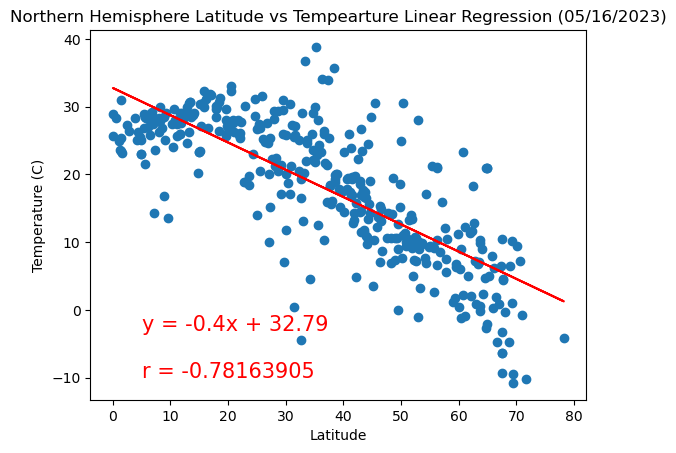

In [22]:
# Linear regression on Northern Hemisphere
Title = f"Northern Hemisphere Latitude vs Tempearture Linear Regression ({formated_date})"
reg_plot(north_df["Lat"].values,
         north_df["Max Temp"].values,
         "Latitude",
         "Temperature (C)",
         Title,(5,-10),
         15)

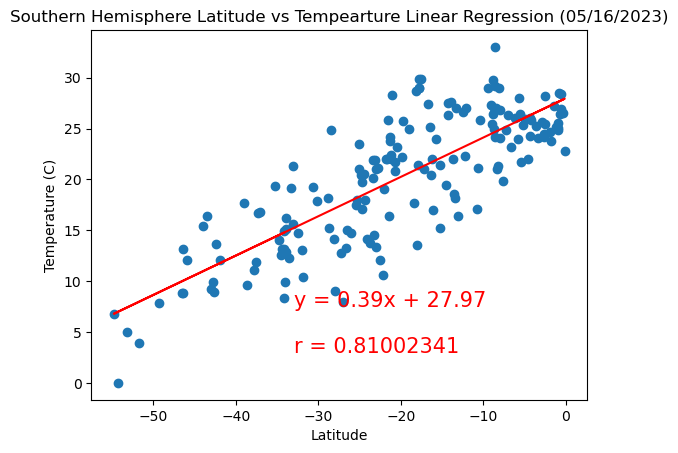

In [20]:
# Linear regression on Southern Hemisphere
Title = f"Southern Hemisphere Latitude vs Tempearture Linear Regression ({formated_date})"
reg_plot(south_df["Lat"].values,
         south_df["Max Temp"].values,
         "Latitude",
         "Temperature (C)",
         Title,
         (-33,3),
         15)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

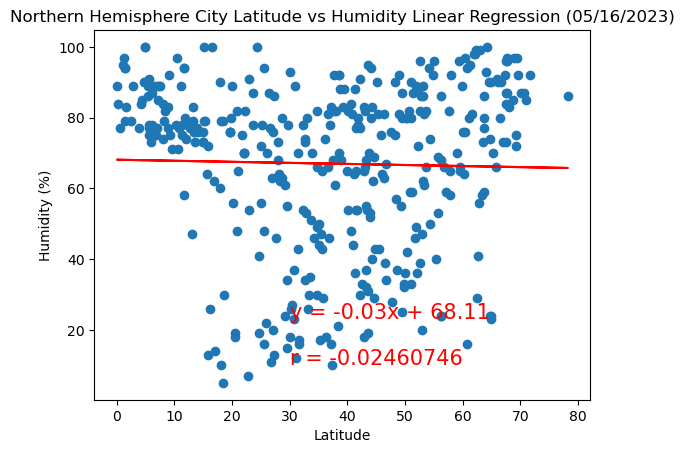

In [23]:
# Northern Hemisphere
Title = f"Northern Hemisphere City Latitude vs Humidity Linear Regression ({formated_date})"
reg_plot(north_df["Lat"].values,
         north_df["Humidity"].values,
         "Latitude",
         "Humidity (%)",
         Title,
         (30,10),
         15)

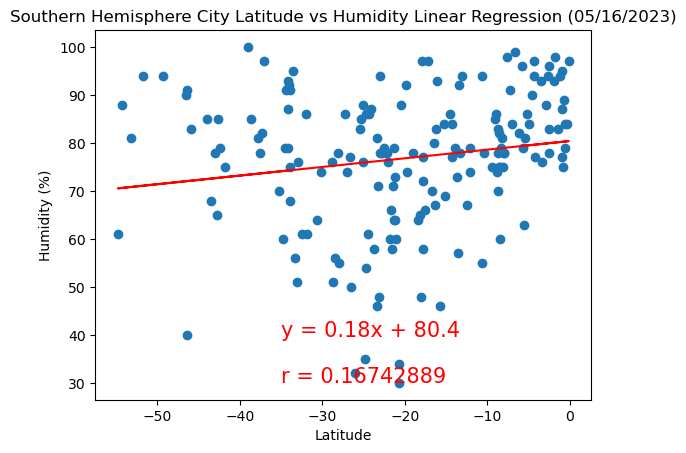

In [26]:
# Southern Hemisphere
Title = f"Southern Hemisphere City Latitude vs Humidity Linear Regression ({formated_date})"
reg_plot(south_df["Lat"].values,
         south_df["Humidity"].values,
         "Latitude",
         "Humidity (%)",
         Title,
         (-35,30),
         15)

**Discussion about the linear relationship:** When the absolute value of the correlation coefficient (|r|) is high, it indicates a strong linear correlation between latitude and maximum temperature in both the northern and southern hemispheres. The reason for the opposite relationship between the hemispheres is likely because the equator acts as a central point, with latitude indicating how far a city is from the equator.

### Cloudiness vs. Latitude Linear Regression Plot

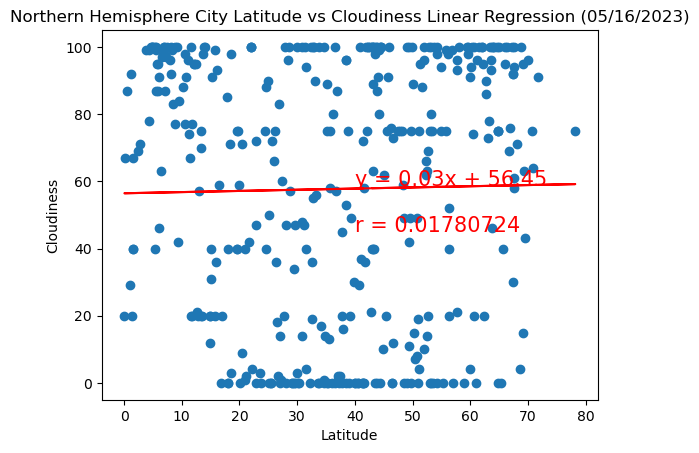

In [27]:
# Northern Hemisphere
Title = f"Northern Hemisphere City Latitude vs Cloudiness Linear Regression ({formated_date})"
reg_plot(north_df["Lat"].values,
         north_df["Cloudiness"].values,
         "Latitude",
         "Cloudiness",
         Title,
         (40,45),
         15)

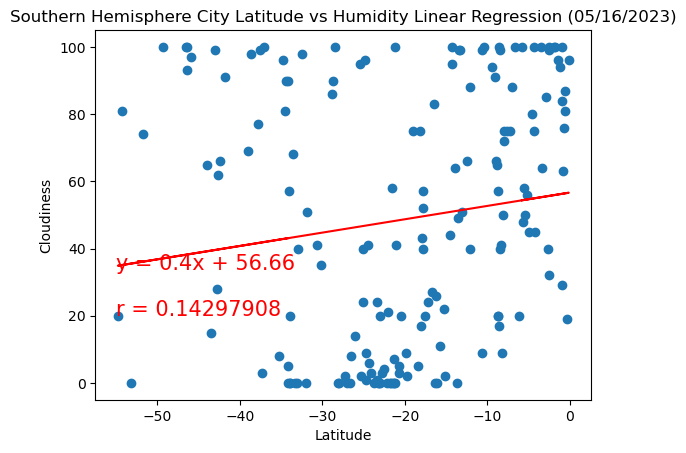

In [28]:
# Southern Hemisphere
Title = f"Southern Hemisphere City Latitude vs Humidity Linear Regression ({formated_date})"
reg_plot(south_df["Lat"].values,
         south_df["Cloudiness"].values,
         "Latitude",
         "Cloudiness",
         Title,
         (-55,20),
         15)

**Discussion about the linear relationship:** The correlation coefficient (|r|) values for the relationship between latitude and cloudiness in both the northern and southern hemispheres are extremely low, which suggests that there is hardly any linear correlation between these variables. This is not surprising since weather patterns are highly unpredictable over long periods of time.


### Wind Speed vs. Latitude Linear Regression Plot

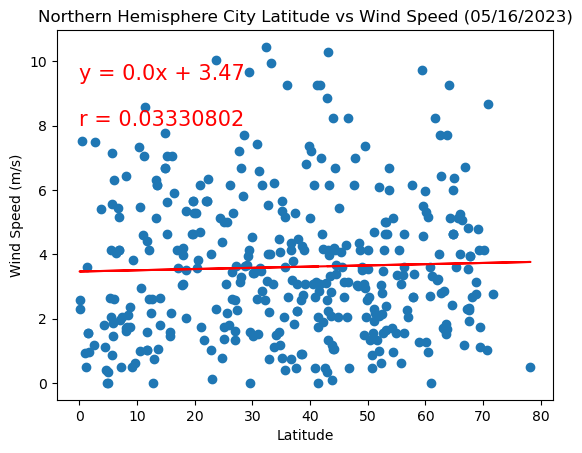

In [29]:
# Northern Hemisphere
Title = f"Northern Hemisphere City Latitude vs Wind Speed ({formated_date})"
reg_plot(north_df["Lat"].values,
         north_df["Wind Speed"].values,
         "Latitude",
         "Wind Speed (m/s)",
         Title,
         (0,8),
         15)

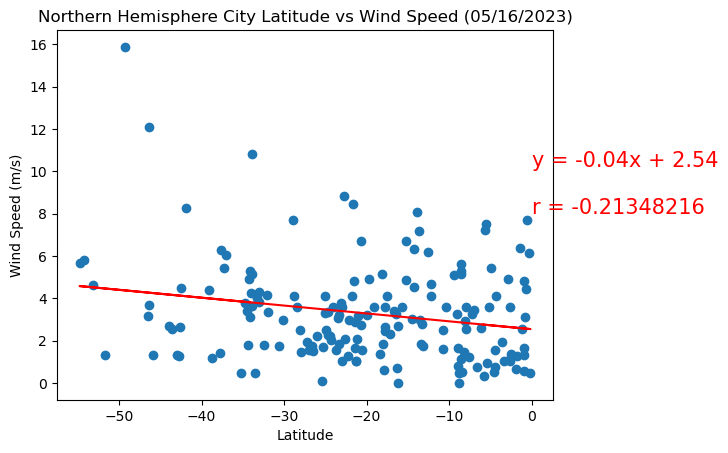

In [30]:
# Southern Hemisphere
Title = f"Northern Hemisphere City Latitude vs Wind Speed ({formated_date})"
reg_plot(south_df["Lat"].values,
         south_df["Wind Speed"].values,
         "Latitude",
         "Wind Speed (m/s)",
         Title,
         (0,8),
         15)

**Discussion about the linear relationship:** The correlation between latitude and wind speed is weak in the southern hemisphere and there is no linear correlation in the northern hemisphere. Although more research is needed to determine if this finding is statistically significant, the low correlation coefficients (r values) for both data sets suggest that there is a weak relationship between latitude and wind speed in either hemisphere.